# <font color = "green"><center>Stock Price Prediction using Machine Learning</center></font>

## Content: 
- [Installing Libraries](#install)
- [Loading Libraries](#load)
- [Loading Dataset](#data)
	- [Option 1: Extracting the data](#extract)
	- [Option 2: Loading the already given data file](#given_data)
- [Explanation to the Open-high-low-close chart (OHLC) Chart](#OHLC)
- [Visualising the plot](#plot)
- [Exponential Smoothing](#smooth)
- [Feature Engineering](#feature)
- [Prepare the prediction parameter](#prediction)
- [Preparing the data for ML model(data_prep)](#data_prep)
- [Logistic Regression with Hyperparameter tuning and Cross validation](#log)
- [Support Vector Classifier with Hyperparameter tuning and Cross validation](#SVC)
- [Decision Tree with Hyperparameter tuning and Cross validation](#dt)
- [Random Forest with Hyperparameter tuning and Cross validation](#rf)
- [Compare the Models Performance](#compare)

## Installing Libraries<a id='install'></a>

In [1]:
# !pip install yfinance
# !pip install finta

## Loading Libraries<a id='load'></a>

In [57]:
# basic python libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import datetime

# related to stock data and stock market indicators
# refer to the link in the References
import yfinance as yf 
from finta import TA

# machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# library to plot the images in the notebook
from IPython.display import Image
from IPython.core.display import HTML 

## Loading Dataset<a id='data'></a>

#### Option 1: Extracting the data<a id='extract'></a>

In [5]:
"define the parameters to extract stock market data"

# refer to the link in the References to get the list of stocks and corresponding tickers
# define the ticker for the stocks you are interested
symbol = 'TSLA' 

num_days = 15000
INTERVAL = '1d'  
symbol = 'SPY' 

# extract the start and end data
start = str((datetime.date.today() - datetime.timedelta(num_days)))
end = str(datetime.date.today())

print("Start Date: ", start)
print("End Date: ", end)

Start Date:  1981-12-22
End Date:  2023-01-16


In [3]:
# extract the data
obj = yf.Ticker(symbol)
data = obj.history(interval='1d', start = start, end = end)
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-14 00:00:00-05:00,399.774230,403.646464,394.498469,397.574341,108111300,0.000,0
2022-12-15 00:00:00-05:00,392.497635,393.443305,386.116962,387.848999,117705900,0.000,0
2022-12-16 00:00:00-05:00,385.179993,386.579987,381.040009,383.269989,119858000,1.781,0
2022-12-19 00:00:00-05:00,383.470001,383.820007,378.279999,380.019989,79878100,0.000,0
2022-12-20 00:00:00-05:00,379.230011,382.230011,377.850006,380.540009,74427200,0.000,0


#### Option 2: Loading the already given data file<a id='given_data'></a>

In [36]:
data = pd.read_csv("SPY_data.csv")
data.head()

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
0,1993-01-29 00:00:00-05:00,25.236152,25.236152,25.110599,25.218216,1003200,0.0,0.0,0.0
1,1993-02-01 00:00:00-05:00,25.236165,25.397591,25.236165,25.397591,480500,0.0,0.0,0.0
2,1993-02-02 00:00:00-05:00,25.379650,25.469331,25.325842,25.451395,201300,0.0,0.0,0.0
3,1993-02-03 00:00:00-05:00,25.487264,25.738370,25.469328,25.720434,529400,0.0,0.0,0.0
4,1993-02-04 00:00:00-05:00,25.810111,25.881855,25.523132,25.828047,531500,0.0,0.0,0.0


In [37]:
# add the 'date' column as an index of the data
# it is not a must thing to do but only doing it for the visualisation plot
data = data.set_index(['date'])

In [38]:
data.shape

(7545, 8)

In [39]:
# access the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7545 entries, 1993-01-29 00:00:00-05:00 to 2023-01-13 00:00:00-05:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Open           7545 non-null   float64
 1   High           7545 non-null   float64
 2   Low            7545 non-null   float64
 3   Close          7545 non-null   float64
 4   Volume         7545 non-null   int64  
 5   Dividends      7545 non-null   float64
 6   Stock Splits   7545 non-null   float64
 7   Capital Gains  7545 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 530.5+ KB


## Explanation to the Open-high-low-close chart (OHLC) Chart<a id='OHLC'></a>

In [40]:
HTML("""
<center>
<img src='https://datavizcatalogue.com/methods/images/anatomy/SVG/OHLC_chart.svg'>
</center>
""")

The stock market uses several key terms to describe the performance of a particular stock. The open, close, high, and low prices refer to the price of a stock at specific points during a trading day.

- **Open:** The open price is the price of a stock at the beginning of a trading day, or the price at which the stock first starts trading on an exchange.
- **Close:** The close price is the price of a stock at the end of a trading day, or the final price at which the stock trades on an exchange before the market closes.
- **High:** The high price is the highest price that a stock trades for during a trading day.
- **Low:** The low price is the lowest price that a stock trades for during a trading day.

In [41]:
# remove the unrequired parameters
data.drop(['Dividends', "Stock Splits", "Capital Gains"], axis = 1, inplace = True)

In [42]:
# rename the parameters
# it is not a must thing to do but doing fr the convenience while declaring parameter names
data.rename(columns={"Close": 'close', "High": 'high', "Low": 'low', 'Volume': 'volume', 
                     'Open': 'open'}, inplace=True)
data.head()

,open,high,low,close,volume
date,,,,,
1993-01-29 00:00:00-05:00,25.236152,25.236152,25.110599,25.218216,1003200
1993-02-01 00:00:00-05:00,25.236165,25.397591,25.236165,25.397591,480500
1993-02-02 00:00:00-05:00,25.379650,25.469331,25.325842,25.451395,201300
1993-02-03 00:00:00-05:00,25.487264,25.738370,25.469328,25.720434,529400
1993-02-04 00:00:00-05:00,25.810111,25.881855,25.523132,25.828047,531500


### Visualising the plot<a id='plot'></a>

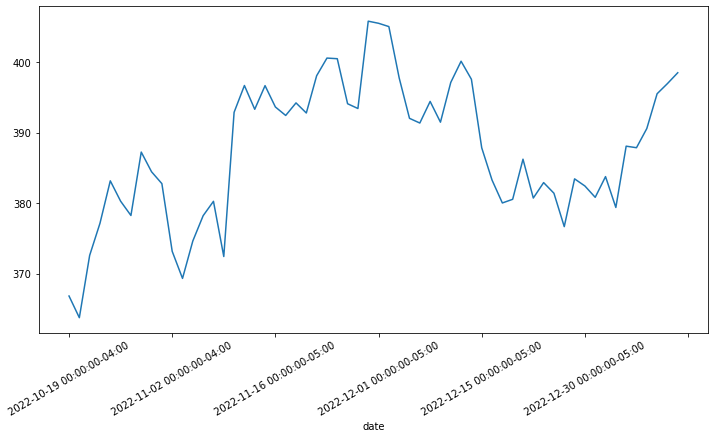

In [43]:
# define the figure size
plt.figure(figsize = (12,6))
# get the current 60 days data 
tmp = data.iloc[-60:]
# plot the data
tmp['close'].plot()
# rotate the labels in the x-axis
plt.xticks(rotation = 30)
plt.show()

## Exponential Smoothing<a id='smooth'></a>

- Exponential smoothing is a commonly used method in time series forecasting because it can effectively capture both the short-term and long-term patterns in the data. The method works by applying a weighted average to the past observations, with more recent observations given more weight and older observations given less weight. This allows the model to capture the more recent variations in the data while also taking into account the overall trend or seasonality of the time series.
- The weighting decreases exponentially as observations come from further in the past.
- The EWM (Exponential Weighted Moving Average) function in Python's Pandas library can be used to apply exponential smoothing to a data set.
- The function takes several parameters such as the data set, the smoothing factor, and the frequency of the data.
- The smoothing factor determines the weight given to more recent observations, with a higher factor giving more weight to recent observations and a lower factor giving more weight to older observations.
- The frequency parameter is used to specify the time frequency of the data, such as daily or monthly.
- The EWM function returns a new data set with the exponential smoothing applied.
- This method can be useful in cases where the data has a trend or seasonality.


**Role of Smoothing factor($\alpha$):**

- The smoothing factor (also known as the smoothing coefficient or the weighting factor) is a key parameter in exponential smoothing that determines the weight given to more recent observations. It is a value between 0 and 1, where a higher value indicates that more weight is given to recent observations, and a lower value indicates that more weight is given to older observations.

- For example, if a smoothing factor of 0.9 is used, the forecast for the next period will be based on 90% of the most recent observation and 10% of the forecast for the previous period. If a smoothing factor of 0.1 is used, the forecast for the next period will be based on 10% of the most recent observation and 90% of the forecast for the previous period.

- The choice of the smoothing factor depends on the characteristics of the data and the forecasting problem. A higher smoothing factor is typically used when the data is highly volatile and subject to rapid changes, while a lower smoothing factor is used when the data is more stable and predictable.

- It's important to note that finding the best smoothing factor requires a process of trial and error, and it depends on the data, the goal of the forecast, and the method used to estimate the forecast. Methods like Grid search, Cross-validation, and Information Criterion are used to find the best smoothing factor.

$$
\text { Forecast for period } t = \alpha * y(t) + (1 - \alpha) * F(t-1)
$$

In [44]:
# exponentially smoothing the data
data = data.ewm(alpha = 0.65).mean()

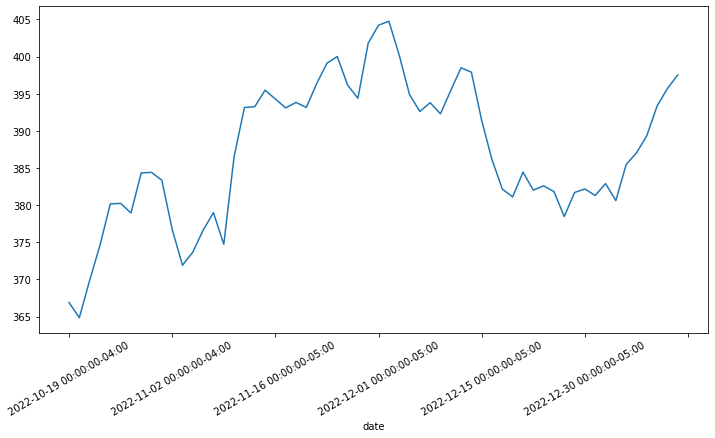

In [45]:
plt.figure(figsize = (12,6))
tmp1 = data.iloc[-60:]
tmp1['close'].plot()
plt.xticks(rotation = 30)
plt.show()

## Feature Engineering<a id='feature'></a>

In [46]:
# List of symbols for technical indicators
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV']

- **RSI (Relative Strength Index):** It is a momentum indicator that compares the magnitude of recent gains to recent losses in an attempt to determine overbought and oversold conditions of an asset.

- **MACD (Moving Average Convergence Divergence):** It is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price.

- **STOCH (Stochastic Oscillator):** A momentum indicator that compares a stock's closing price to its price range over a given period of time. It is used to identify overbought or oversold conditions.

- **ADL (Accumulation/Distribution Line):** A momentum indicator that uses volume flow to assess the buying and selling pressure of a security.

- **ATR (Average True Range):** A volatility indicator that measures the range between the high and low prices of a security over a given period of time.

- **MOM (Momentum Indicator):** A momentum indicator that compares the current closing price of a security to its closing price "n" periods ago.

- **MFI (Money Flow Index):** A momentum indicator that uses both price and volume to measure buying and selling pressure.

- **ROC (Rate of Change):** A momentum indicator that measures the percentage change in price over a specified period of time.

- **OBV (On-Balance Volume):** A momentum indicator that uses volume to assess the buying and selling pressure of a security.

- **CCI (Commodity Channel Index):** A momentum indicator that measures the deviation of an asset's price from its statistical mean.

- **EMV (Ease of Movement):** A volume-based indicator that is used to assess the relationship between price and volume.

In [148]:
def indicator_data(data):
    """
    Function that uses the finta API to calculate technical indicators
    """

    for indicator in INDICATORS:
        # generate the indicator information for the data and
        # add the parameters with the original data
        ind_data = eval('TA.' + indicator + '(data)')
        if not isinstance(ind_data, pd.DataFrame):
            ind_data = ind_data.to_frame()
        data = data.merge(ind_data, left_index=True, right_index=True)

    # calculate moving averages for features
    data['ema50'] = data['close'] / data['close'].ewm(50).mean()
    data['ema21'] = data['close'] / data['close'].ewm(21).mean()
    data['ema15'] = data['close'] / data['close'].ewm(14).mean()
    data['ema5'] = data['close'] / data['close'].ewm(5).mean()

    # it is a choice - you can remove these parameters as the 'close' parameter is the most 
    # one out of other features that we have engineered
    del (data['open'])
    del (data['high'])
    del (data['low'])
    del (data['volume'])
    
    return data

In [149]:
data = indicator_data(data)
print(data.columns)

Index(['close', '14 period RSI_x', 'MACD_x', 'SIGNAL_x',
       '14 period STOCH %K_x', 'MFV_x', '14 period ATR_x', 'MOM_x',
       '14 period MFI_x', 'ROC_x', 'OBV_x', '20 period CCI_x',
       '14 period EMV._x', 'ema50', 'ema21', 'ema15', 'ema5', 'pred',
       '14 period RSI_y', 'MACD_y', 'SIGNAL_y', '14 period STOCH %K_y',
       'MFV_y', '14 period ATR_y', 'MOM_y', '14 period MFI_y', 'ROC_y',
       'OBV_y', '20 period CCI_y', '14 period EMV._y'],
      dtype='object')


In [150]:
data.head()

,close,14 period RSI_x,MACD_x,SIGNAL_x,14 period STOCH %K_x,MFV_x,14 period ATR_x,MOM_x,14 period MFI_x,ROC_x,...,SIGNAL_y,14 period STOCH %K_y,MFV_y,14 period ATR_y,MOM_y,14 period MFI_y,ROC_y,OBV_y,20 period CCI_y,14 period EMV._y
date,,,,,,,,,,,,,,,,,,,,,
1993-02-19 00:00:00-05:00,24.985080,31.941097,-0.079473,-0.021567,23.813029,2.432075e+06,0.243239,-0.770167,68.289031,-1.707873,...,0.000000,NaN,40198.668908,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-02-22 00:00:00-05:00,25.055014,36.400711,-0.087585,-0.035153,29.773421,2.568509e+06,0.244688,-0.735964,66.635763,-2.197573,...,0.000872,NaN,176632.239761,NaN,NaN,NaN,NaN,381808.577151,66.666667,NaN
1993-02-23 00:00:00-05:00,25.067835,37.213027,-0.091891,-0.046762,30.866201,2.627540e+06,0.249377,-0.735590,66.907206,-2.669016,...,0.001497,NaN,235663.815513,NaN,NaN,NaN,NaN,758346.579060,69.455336,NaN
1993-02-24 00:00:00-05:00,25.282176,48.951238,-0.080546,-0.053642,49.134265,2.742237e+06,0.252596,-0.408984,64.443198,-1.972787,...,0.004531,NaN,350360.924621,NaN,NaN,NaN,NaN,907229.878314,133.333333,NaN
1993-02-25 00:00:00-05:00,25.392168,53.731575,-0.063792,-0.055702,58.508790,2.803848e+06,0.243698,-0.283043,60.438035,-1.593807,...,0.008831,NaN,411971.398376,NaN,NaN,NaN,NaN,988264.032905,118.448137,NaN


In [151]:
data.shape

(7501, 30)

## Prepare the prediction parameter<a id='prediction'></a>

In [168]:
def prepare_prediction(data, window):
    
    # compare the closing price of the share on the given data
    # with the price of the share on the window
    prediction = (data.shift(-window)['close'] >= data['close'])
    prediction = prediction.iloc[:-window]
    data['pred'] = prediction.astype(int)
    del (data['close'])
    
    return data

In [169]:
data = prepare_prediction(data, window = 20)

# remove the data parameter with NULL values
data = data.dropna()
data.tail()

,14 period RSI_x,MACD_x,SIGNAL_x,14 period STOCH %K_x,MFV_x,14 period ATR_x,MOM_x,14 period MFI_x,ROC_x,OBV_x,...,SIGNAL_y,14 period STOCH %K_y,MFV_y,14 period ATR_y,MOM_y,14 period MFI_y,ROC_y,OBV_y,20 period CCI_y,14 period EMV._y
date,,,,,,,,,,,,,,,,,,,,,
2022-09-28 00:00:00-04:00,28.643301,-9.541259,-6.930452,13.743764,4.044381e+10,7.467414,-25.797297,19.985962,-9.435293,4.329039e+10,...,-6.930452,13.743764,4.044142e+10,7.467414,-25.797297,19.985962,-9.435293,4.328866e+10,-138.755324,-0.137878
2022-09-29 00:00:00-04:00,26.591762,-9.940850,-7.532532,8.725848,4.044532e+10,7.612577,-25.679710,13.542258,-8.086231,4.317888e+10,...,-7.532532,8.725848,4.044292e+10,7.612577,-25.679710,13.542258,-8.086231,4.317715e+10,-134.913264,-0.180194
2022-09-30 00:00:00-04:00,24.090813,-10.531958,-8.132417,3.367039,4.035569e+10,7.837203,-27.350597,7.511160,-8.750177,4.303994e+10,...,-8.132417,3.367039,4.035330e+10,7.837203,-27.350597,7.511160,-8.750177,4.303821e+10,-131.251375,-0.210874
2022-10-03 00:00:00-04:00,30.392247,-10.525290,-8.610992,15.038394,4.037464e+10,7.638390,-23.768528,14.900895,-6.739311,4.314691e+10,...,-8.610992,15.038394,4.037224e+10,7.638390,-23.768528,14.900895,-6.739311,4.314518e+10,-104.296465,-0.169111
2022-10-04 00:00:00-04:00,41.068145,-9.691356,-8.827064,39.910739,4.045320e+10,7.942665,-12.278811,22.128018,-3.652339,4.325169e+10,...,-8.827064,39.910739,4.045081e+10,7.942665,-12.278811,22.128018,-3.652339,4.324996e+10,-59.631696,-0.105051


In [170]:
data.shape

(7447, 29)

In [171]:
np.unique(data['pred'])

array([0., 1.])

In [172]:
data['pred'].value_counts()

1.0    4824
0.0    2623
Name: pred, dtype: int64

## Preparing the data for ML model(data_prep)<a id='data_prep'></a>

In [173]:
# input data
x = data.drop('pred', axis =1)
#output data
y = data['pred']

In [174]:
# Split the data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state = 21)

In [175]:
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (5957, 28)
Test data size :  (1490, 28)


## Logistic Regression with Hyperparameter tuning and Cross validation<a id='log'></a>

#### Model Training 

In [176]:
# define the parameter
parameters = {'max_iter': [100, 200, 500]}
# initialise the model
lr_classifier = LogisticRegression()
# initialise Hyperparameter tuning and Cross validation
lr_classifier_rs = RandomizedSearchCV(estimator = lr_classifier, param_distributions= parameters, cv = 5, random_state=21, verbose=1)

In [177]:
# train the model
lr_classifier_rs.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 200, 500]},
                   random_state=21, verbose=1)

In [178]:
# function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    print("Best score : ", model.best_score_)

In [179]:
# get the best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression()
Best set of parameters :  {'max_iter': 100}
Best score :  0.6468017964712975


#### Model prediction

In [180]:
y_pred_lr = lr_classifier_rs.predict(X_test)

#### Model Evaluation

In [181]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_lr)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.6463087248322148


In [182]:
# function to plot confusion matrix

def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize=(6,4))
    im = ax.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    ax.figure.colorbar(im, ax = ax)
    
    ax.set(xticks = np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    
    thresh = cm.max() / 2.
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    
    fig.tight_layout()

In [183]:
cm = confusion_matrix(y_test.values,y_pred_lr)
cm

array([[  0, 523],
       [  4, 963]])

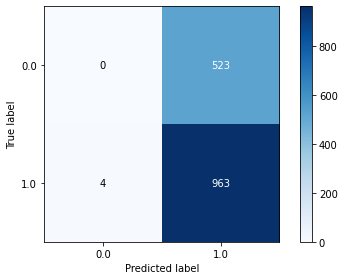

In [184]:
# cm = confusion_matrix(y_test.values,y_pred_lr)
plot_confusion_matrix(cm, np.unique(y_pred_lr))

# Support Vector Classifier with Hyperparameter tuning and Cross validation<a id='SVC'></a>

#### Model Training

In [202]:
parameters = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'C':[1.0, 2.0]
}

svm_rs = RandomizedSearchCV(estimator = SVC(), param_distributions=parameters, cv = 5, random_state = 42, verbose = 1)

In [203]:
svm_rs.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   33.2s finished


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1.0, 2.0],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   random_state=42, verbose=1)

In [204]:
# get the best random search attributes
get_best_randomsearch_results(svm_rs)

Best estimator :  SVC()
Best set of parameters :  {'kernel': 'rbf', 'C': 1.0}
Best score :  0.6474735009213396


#### Model Prediction

In [205]:
y_pred_svm = svm_rs.predict(X_test)

#### Model Evaluation

In [227]:
svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_svm)
print("Accuracy using Kernel SVM : ", kernel_svm_accuracy)

Accuracy using Kernel SVM :  0.648993288590604


In [207]:
lr_accuracy

0.6463087248322148

In [208]:
cm = confusion_matrix(y_test.values, y_pred_svm)
cm

array([[  0, 523],
       [  0, 967]])

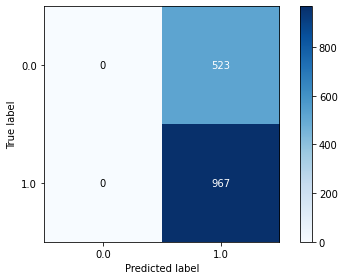

In [192]:
# cm = confusion_matrix(y_test.values,y_pred_lr)
plot_confusion_matrix(cm, np.unique(y_pred_lr))

# Decision Tree with Hyperparameter tuning and Cross validation<a id='dt'></a>

#### Model Training

In [223]:
parameters = {'max_depth': np.arange(2, 20, 2)}

dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier, param_distributions = parameters, random_state = 42, cv = 5, verbose = 1)

In [224]:
dt_classifier_rs.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    4.2s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   random_state=42, verbose=1)

#### Model Prediction

In [225]:
y_pred_dt = dt_classifier_rs.predict(X_test)

#### Model Evaluation

In [226]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_dt)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.8261744966442953


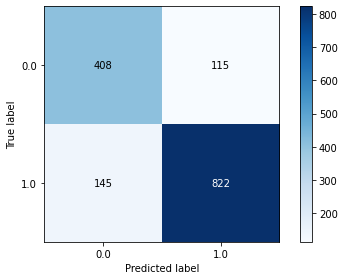

In [216]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

# Random Forest with Hyperparameter tuning and Cross validation<a id='rf'></a>

#### Model Training

In [217]:
parameters = {
    'n_estimators':[110,130,140,150,160,180,200], 
    'max_depth': np.arange(2, 17, 2)
}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=parameters,random_state = 42, verbose = 1, cv = 5)


In [218]:
rf_classifier_rs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16]),
                                        'n_estimators': [110, 130, 140, 150,
                                                         160, 180, 200]},
                   random_state=42, verbose=1)

#### Model Prediction

In [219]:
y_pred = rf_classifier_rs.predict(X_test)

#### Model Evaluation

In [220]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.876510067114094


In [221]:
cm = confusion_matrix(y_test.values, y_pred)
cm

array([[372, 151],
       [ 33, 934]])

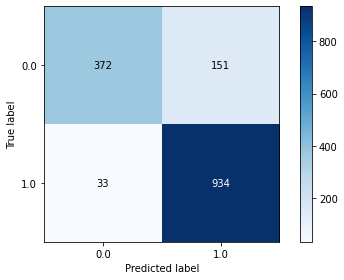

In [222]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))

# Compare the Models Performance<a id='compare'></a>

In [229]:
model_results = {
    'LR': lr_accuracy,
    'SVM': svm_accuracy,
    'DT': dt_accuracy,
    'RF': rf_accuracy
}

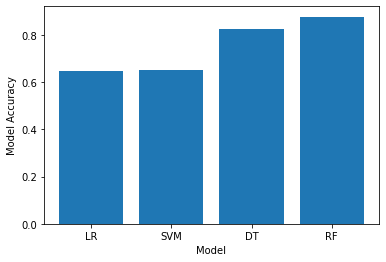

In [231]:
plt.bar(range(len(model_results)), model_results.values(), align='center')
plt.xticks(range(len(model_results)), list(model_results.keys()))
plt.ylabel("Model Accuracy")
plt.xlabel("Model")
plt.show()

## References:

- yfinance Python Tutorial - https://analyzingalpha.com/yfinance-python#How_to_Download_Fundamental_Data_Using_yfinance
- list of stocks and corresponding tickers: https://stockanalysis.com/stocks/